In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("clouds.csv")
data[:5]

x         y
0  0.894677  4.474800
1  1.006291  4.267872
2  1.688823  4.136460
3  2.695726  4.596911
4  2.304983  4.703092

In [4]:
x=np.array(data["x"])
y=np.array(data["y"])

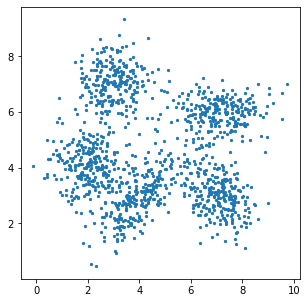

In [8]:
plt.scatter(x,y,s=5)
plt.gcf().set_size_inches(5,5)

In [9]:
X=np.array(data[["x","y"]])

In [10]:
from sklearn.cluster import KMeans

In [12]:
model=KMeans(n_clusters=5)

In [13]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
model.labels_

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [16]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

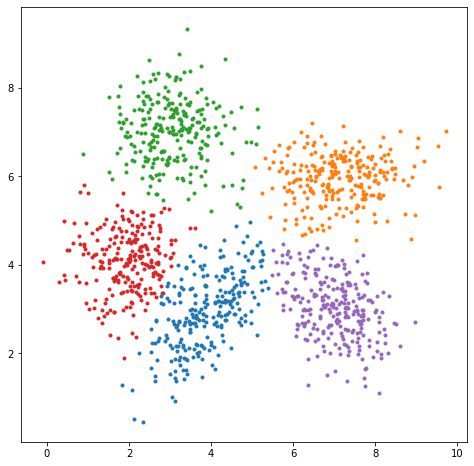

In [19]:
for j in range(len(np.unique(model.labels_))):
    p,q=X[model.labels_==j].T
    plt.scatter(p,q,marker=".")
plt.gcf().set_size_inches(8,8)

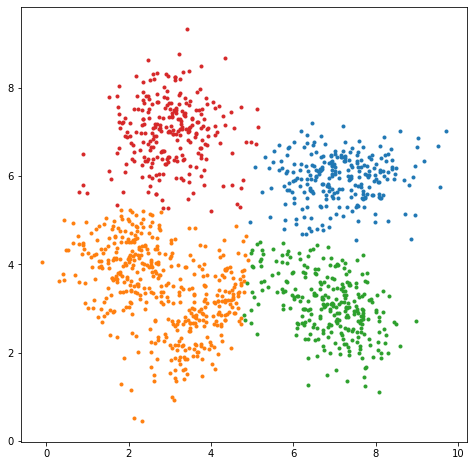

In [20]:
model=KMeans(n_clusters=4)
model.fit(X)
for j in range(len(np.unique(model.labels_))):
    p,q=X[model.labels_==j].T
    plt.scatter(p,q,marker=".")
plt.gcf().set_size_inches(8,8)

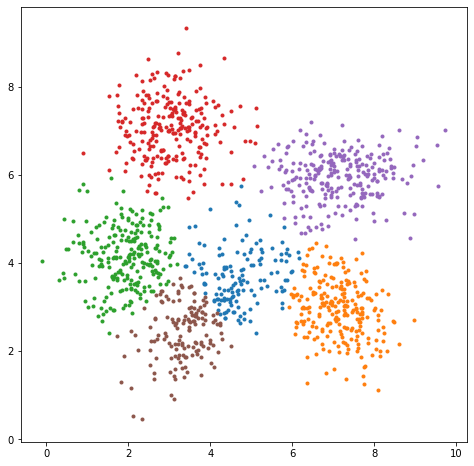

In [21]:
model=KMeans(n_clusters=6)
model.fit(X)
for j in range(len(np.unique(model.labels_))):
    p,q=X[model.labels_==j].T
    plt.scatter(p,q,marker=".")
plt.gcf().set_size_inches(8,8)

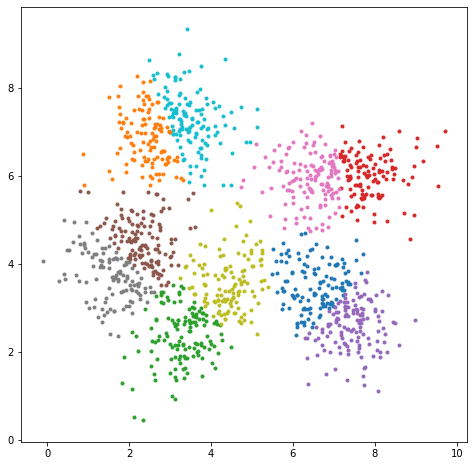

In [22]:
model=KMeans(n_clusters=10)
model.fit(X)
for j in range(len(np.unique(model.labels_))):
    p,q=X[model.labels_==j].T
    plt.scatter(p,q,marker=".")
plt.gcf().set_size_inches(8,8)

In [23]:
ls *.csv

clouds.csv                  homes-91325.csv          Ventura-Homes.csv
COVID19_line_list_data.csv  NY.csv                   wine-data.csv
date_table.csv              old_faithful_geyser.csv  wine-labeled.csv
donut-points-for-svm.csv    points-for-svm.csv
elliptical_cloud.csv        spirals.csv


In [24]:
OF=pd.read_csv("old_faithful_geyser.csv")

In [27]:
OF[:10]

eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85
5      2.883       55
6      4.700       88
7      3.600       85
8      1.950       51
9      4.350       85

In [28]:
X=OF["eruptions"]
Y=OF["waiting"]

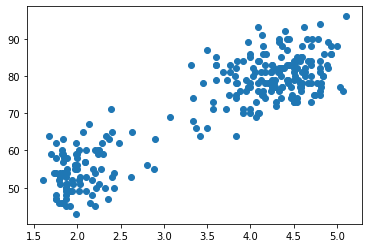

In [29]:
plt.scatter(X,Y)

In [40]:
X= np.array(OF[["eruptions","waiting"]])

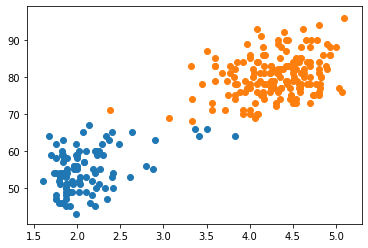

In [41]:
model=KMeans(n_clusters=2)
model.fit(X)
for j in range(2):
    p,q=X[model.labels_==j].T
    plt.scatter(p,q)

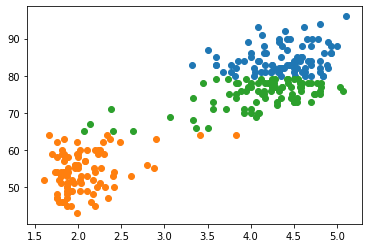

In [45]:
model=KMeans(n_clusters=3)
model.fit(X)
for j in range(3):
    p,q=X[model.labels_==j].T
    plt.scatter(p,q)

In [ ]:
# Silhouette Score

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
scores = []
X=np.array(data[["x","y"]]) # clouds
for number_of_clusters in range(2,10):
    model=KMeans(n_clusters=number_of_clusters)
    model.fit(X)
    S=silhouette_score(X, model.labels_)
    scores.append(S)

In [48]:
scores

[0.45732199395679546,
 0.4937671451959754,
 0.5124131729697601,
 0.520581359751866,
 0.5050814280890189,
 0.47047965796621494,
 0.43389228853458717,
 0.38064532665551826]

Text(0, 0.5, 'Silhouette Score')

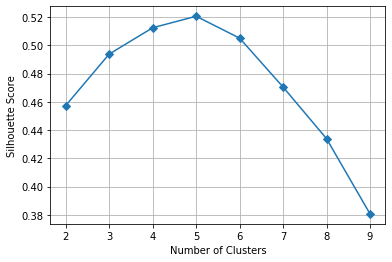

In [53]:
plt.plot(range(2,10),scores,marker="D")
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

In [54]:
G= np.array(OF[["eruptions","waiting"]])

In [55]:
scores = []
for number_of_clusters in range(2,10):
    model=KMeans(n_clusters=number_of_clusters)
    model.fit(G)
    S=silhouette_score(G, model.labels_)
    scores.append(S)

Text(0, 0.5, 'Silhouette Score')

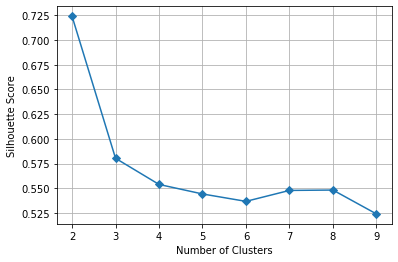

In [56]:
plt.plot(range(2,10),scores,marker="D")
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

In [57]:
Spirals=pd.read_csv("spirals.csv")

In [61]:
X=np.array(Spirals[["x","y"]])

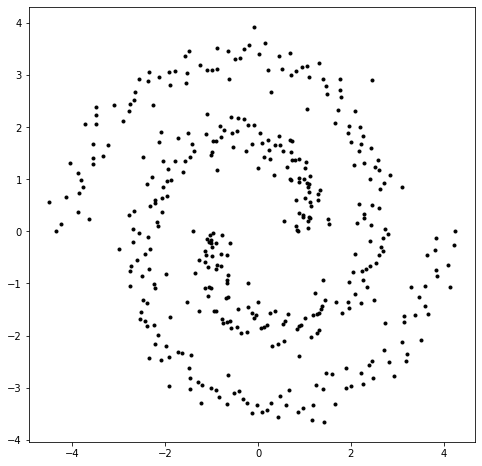

In [62]:
plt.scatter(X[:,0], X[:,1], marker=".", c="k")
plt.gcf().set_size_inches(8,8)

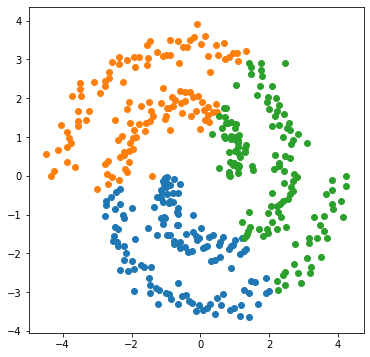

In [65]:
model=KMeans(n_clusters=3)
model.fit(X)
for j in range(3):
    p,q=X[model.labels_==j].T
    plt.scatter(p,q)
plt.gcf().set_size_inches(6,6)

In [66]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)

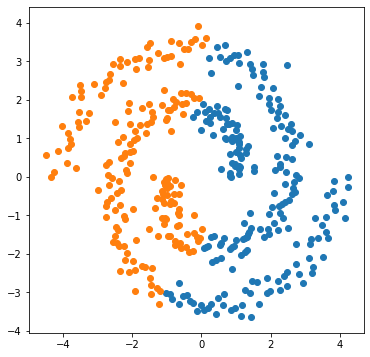

In [67]:
model.fit(X)
for j in range(2):
    p,q=X[model.labels_==j].T
    plt.scatter(p,q)
plt.gcf().set_size_inches(6,6)

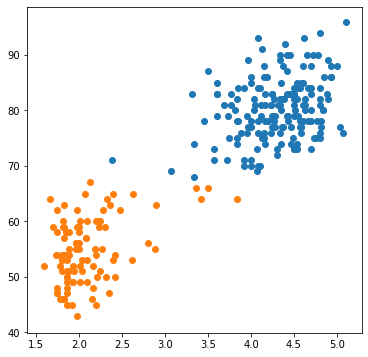

In [69]:
model = AgglomerativeClustering(n_clusters=2)
model.fit(G)
for j in range(2):
    p,q=G[model.labels_==j].T
    plt.scatter(p,q)
plt.gcf().set_size_inches(6,6)

In [70]:
from scipy.cluster import hierarchy
Z=hierarchy.linkage(G, 'ward')

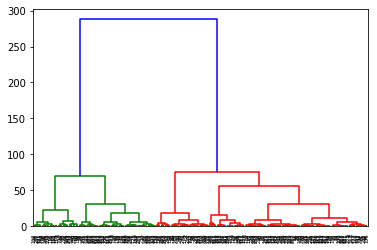

In [72]:
fig,ax=plt.subplots()
D=hierarchy.dendrogram(Z)

In [73]:
Z=hierarchy.linkage(G, 'single')

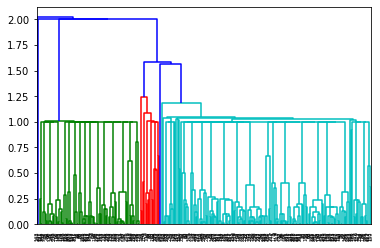

In [74]:
fig,ax=plt.subplots()
D=hierarchy.dendrogram(Z)

In [75]:
from sklearn.cluster import DBSCAN

In [76]:
model = DBSCAN(eps=.5, min_samples=5)
model.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [77]:
np.unique(np.array(model.labels_), return_counts=True)

(array([-1,  0,  1]), array([  3, 200, 197]))

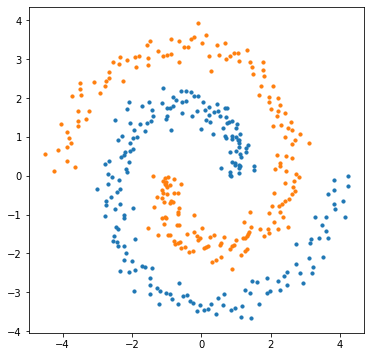

In [79]:
for j in np.unique(np.array(model.labels_)):
    if j<0:
        continue
    p,q=X[model.labels_==j].T
    plt.scatter(p,q,s=10)
plt.gcf().set_size_inches(6,6)

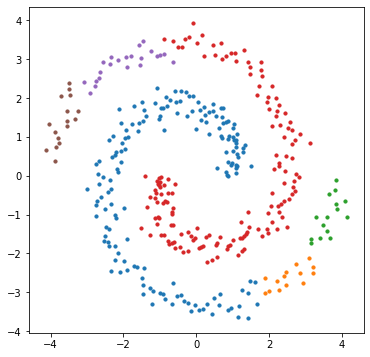

In [80]:
model = DBSCAN(eps=.4, min_samples=5)
model.fit(X)
for j in np.unique(np.array(model.labels_)):
    if j<0:
        continue
    p,q=X[model.labels_==j].T
    plt.scatter(p,q,s=10)
plt.gcf().set_size_inches(6,6)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([166,  65,  19,   5,  15,  10,   3,   5,  27,  11,   9,  20,  13,
          6,  15,   6,   5]))

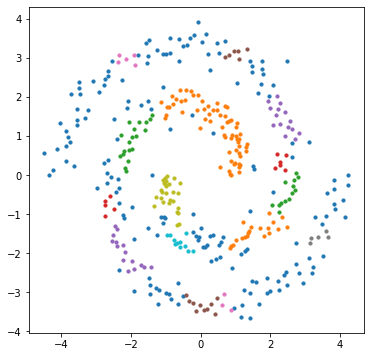

In [83]:
model = DBSCAN(eps=.3, min_samples=5)
model.fit(X)
for j in np.unique(np.array(model.labels_)):
    #if j<0:
    #    continue
    p,q=X[model.labels_==j].T
    plt.scatter(p,q,s=10)
plt.gcf().set_size_inches(6,6)
np.unique(model.labels_,return_counts=True)

In [84]:
ls *.csv

clouds.csv                  homes-91325.csv          Ventura-Homes.csv
COVID19_line_list_data.csv  NY.csv                   wine-data.csv
date_table.csv              old_faithful_geyser.csv  wine-labeled.csv
donut-points-for-svm.csv    points-for-svm.csv
elliptical_cloud.csv        spirals.csv


In [85]:
cd Desktop

/home/biomathman/Desktop


In [86]:
ls *.csv

ls: cannot access '*.csv': No such file or directory


In [87]:
ls *.txt

smiley.txt*


In [91]:
Data=pd.read_csv("smiley.txt",names=("x","y"))

In [92]:
Data[:5]

x         y
0  1.142175  5.653880
1  0.961976  5.654621
2  0.043144  5.031154
3  7.976526  2.027480
4  6.313825  6.489383

In [94]:
XY=np.array(Data[["x","y"]])

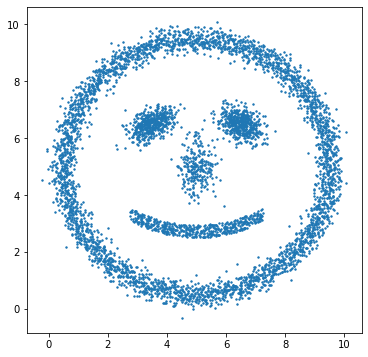

In [98]:
plt.scatter(XY[:,0],XY[:,1],s=2)
plt.gcf().set_size_inches(6,6)

In [ ]:
# Homework - try to cluster smiley.txt using dbscan
# use trial and error to modify eps and num_samples

# using the wine-labeled data set
# cluster the vectors